In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [85]:
# import cleaned data for diabetes and fastfood per county(FIPS) and year
diabetes_fastfood = 'diab_fastfood_clean_df.csv'
diabetes_fastfood_pd = pd.read_csv(diabetes_fastfood)

diabetes_fastfood_pd.head()

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
0,1,17001.0,Illinois,Adams,9.0,67054.0,2011,6035.0,31.0
1,2,17003.0,Illinois,Alexander,11.0,7914.0,2011,871.0,0.0
2,3,17005.0,Illinois,Bond,9.0,18103.0,2011,1629.0,7.0
3,4,17007.0,Illinois,Boone,7.0,54020.0,2011,3781.0,26.0
4,5,17009.0,Illinois,Brown,8.0,6591.0,2011,527.0,2.0


In [86]:
# Time for some exploration

county_stats = diabetes_fastfood_pd.groupby("County")
county_stats.mean()

,Unnamed: 0,FIPS,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
County,,,,,,,
Adams,104.666667,17001.0,10.666667,66492.333333,2016.0,7080.333333,33.666667
Alexander,105.666667,17003.0,10.666667,7055.666667,2016.0,786.000000,0.333333
Bond,106.666667,17005.0,8.666667,17266.000000,2016.0,1502.000000,8.000000
Boone,107.666667,17007.0,8.666667,53811.000000,2016.0,4662.333333,24.666667
Brown,108.666667,17009.0,8.000000,6667.000000,2016.0,533.333333,3.000000
...,...,...,...,...,...,...,...
Whiteside,201.666667,17195.0,11.333333,57004.000000,2016.0,6423.333333,30.000000
Will,202.666667,17197.0,9.000000,687137.666667,2016.0,61860.666667,436.000000
Williamson,203.666667,17199.0,10.666667,66258.000000,2016.0,7074.666667,42.666667


In [87]:
# Spot check some counties
check_county = diabetes_fastfood_pd.loc[diabetes_fastfood_pd["County"].isin(['DuPage', 'Will', 'Lake']), :]

check_county

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
21,22,17043.0,Illinois,DuPage,8.0,932541.0,2011,74603.0,838.0
48,49,17097.0,Illinois,Lake,8.0,712567.0,2011,57005.0,530.0
98,99,17197.0,Illinois,Will,8.0,685251.0,2011,54820.0,441.0
123,125,17043.0,Illinois,DuPage,8.0,932708.0,2016,74617.0,875.0
150,152,17097.0,Illinois,Lake,9.0,705186.0,2016,63467.0,567.0
200,202,17197.0,Illinois,Will,9.0,685419.0,2016,61688.0,501.0
225,230,17043.0,Illinois,DuPage,7.0,922921.0,2021,64604.0,718.0
252,257,17097.0,Illinois,Lake,9.0,696535.0,2021,62688.0,430.0
302,307,17197.0,Illinois,Will,10.0,690743.0,2021,69074.0,366.0


In [88]:
# plot all counties by year for top populated counties
top_counties_dp = diabetes_fastfood_pd.nlargest(10, 'Population')
top_counties_dp 

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
15,16,17031.0,Illinois,Cook,9.0,5287037.0,2011,475833.0,4106.0
117,119,17031.0,Illinois,Cook,10.0,5246456.0,2016,524646.0,4642.0
219,224,17031.0,Illinois,Cook,10.0,5150233.0,2021,515023.0,2889.0
123,125,17043.0,Illinois,DuPage,8.0,932708.0,2016,74617.0,875.0
21,22,17043.0,Illinois,DuPage,8.0,932541.0,2011,74603.0,838.0
225,230,17043.0,Illinois,DuPage,7.0,922921.0,2021,64604.0,718.0
48,49,17097.0,Illinois,Lake,8.0,712567.0,2011,57005.0,530.0
150,152,17097.0,Illinois,Lake,9.0,705186.0,2016,63467.0,567.0
252,257,17097.0,Illinois,Lake,9.0,696535.0,2021,62688.0,430.0
302,307,17197.0,Illinois,Will,10.0,690743.0,2021,69074.0,366.0


In [89]:
top_counties = top_counties_dp["County"].unique()
top_counties

array(['Cook', 'DuPage', 'Lake', 'Will'], dtype=object)

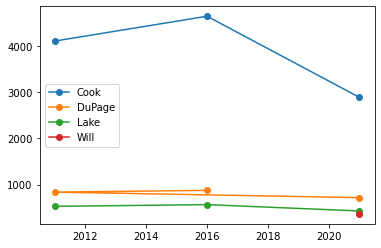

In [90]:
county_by_year = pd.DataFrame()

# plt.plot(years, fast_food)


for county in top_counties:
    county_by_year = top_counties_dp.loc[top_counties_dp["County"] == county, :]

    years = county_by_year["Year"]
    fast_food = county_by_year["Restaurant Count"]
    plt.plot(years, fast_food, label=county, marker='o')
plt.legend()
plt.show()


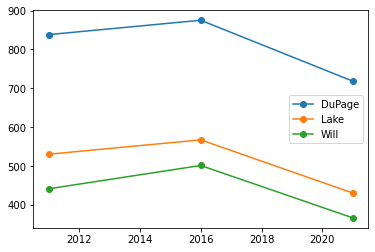

In [91]:
# select certain counties excluding Cook to see the progress of restaurants over the years
top_counties = check_county["County"].unique()
county_by_year = pd.DataFrame()

# plt.plot(years, fast_food)


for county in top_counties:
    county_by_year = check_county.loc[check_county["County"] == county, :]

    years = county_by_year["Year"]
    fast_food = county_by_year["Restaurant Count"]
    plt.plot(years, fast_food, label=county, marker='o')
plt.legend()
plt.show()

In [92]:
# This shows that there is a disconnect between data from 2011-2016 and the data for 2021 and that can be explained by:
# 1 - different methodologies
# 2 - yelp api rate limit
# 3 - covid might have caused fast food restaurants to shut down or not be opened at the same rate

In [93]:
# add bar chart for diabetes per year
diabetes_fastfood_pd.head()

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count
0,1,17001.0,Illinois,Adams,9.0,67054.0,2011,6035.0,31.0
1,2,17003.0,Illinois,Alexander,11.0,7914.0,2011,871.0,0.0
2,3,17005.0,Illinois,Bond,9.0,18103.0,2011,1629.0,7.0
3,4,17007.0,Illinois,Boone,7.0,54020.0,2011,3781.0,26.0
4,5,17009.0,Illinois,Brown,8.0,6591.0,2011,527.0,2.0


In [94]:
# x- axis is Year, y-axis is % Diabetic
diabetic_progress = diabetes_fastfood_pd.groupby("Year")
diabetic_progress_dp = diabetic_progress.sum()
diabetic_progress_dp

,Unnamed: 0,FIPS,% Diabetic,Population,Diabetic Population,Restaurant Count
Year,,,,,,
2011,5253,1744404.0,904.0,12910409.0,1109361.0,9173.0
2016,15759,1744404.0,1014.0,12880580.0,1237103.0,10134.0
2021,26469,1744404.0,1127.0,12671821.0,1286325.0,7343.0


In [95]:

plt.figure(figsize=(20,3))
diabetic_progress_dp["Years"] = diabetic_progress_dp.index
diabetic_progress_dp = diabetic_progress_dp.reset_index(drop=True)
years = diabetic_progress_dp["Years"]

<Figure size 1440x216 with 0 Axes>

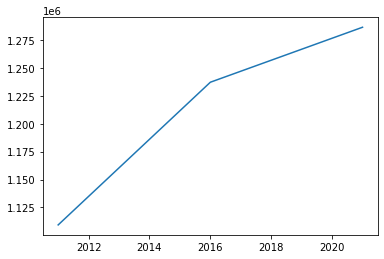

In [96]:
plt.plot(years, diabetic_progress_dp["Diabetic Population"])
# add labels and limits-----------------------------

In [97]:
# add column for fast food per capita
diabetes_fastfood_pd
diabetes_fastfood_pd["Restaurant per Capita"] = \
                    diabetes_fastfood_pd["Restaurant Count"]/(diabetes_fastfood_pd["Population"]/1000)
diabetes_fastfood_pd

,Unnamed: 0,FIPS,State,County,% Diabetic,Population,Year,Diabetic Population,Restaurant Count,Restaurant per Capita
0,1,17001.0,Illinois,Adams,9.0,67054.0,2011,6035.0,31.0,0.462314
1,2,17003.0,Illinois,Alexander,11.0,7914.0,2011,871.0,0.0,0.000000
2,3,17005.0,Illinois,Bond,9.0,18103.0,2011,1629.0,7.0,0.386676
3,4,17007.0,Illinois,Boone,7.0,54020.0,2011,3781.0,26.0,0.481303
4,5,17009.0,Illinois,Brown,8.0,6591.0,2011,527.0,2.0,0.303444
...,...,...,...,...,...,...,...,...,...,...
301,306,17195.0,Illinois,Whiteside,15.0,55175.0,2021,8276.0,26.0,0.471228
302,307,17197.0,Illinois,Will,10.0,690743.0,2021,69074.0,366.0,0.529864
303,308,17199.0,Illinois,Williamson,13.0,66597.0,2021,8658.0,38.0,0.570596
304,309,17201.0,Illinois,Winnebago,11.0,282572.0,2021,31083.0,195.0,0.690090


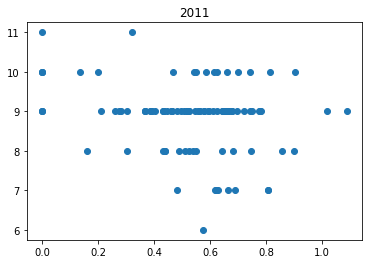

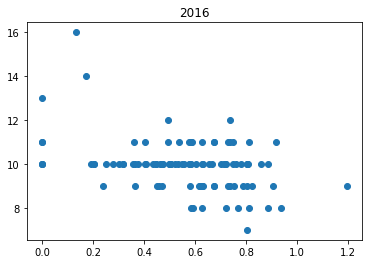

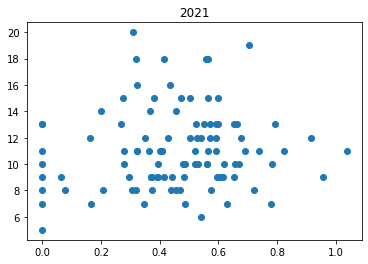

In [101]:
# plot scatter for fast food per capita on x and % diabetes on y, a chart for each year
# 2011


for year in years:
    year_data = diabetes_fastfood_pd.loc[diabetes_fastfood_pd["Year"] == year, :]
    restaurants = year_data["Restaurant per Capita"]
    diabetes = year_data["% Diabetic"]
    plt.scatter(restaurants,diabetes)
    plt.title(year)
    # add labels and titles
    plt.show()


The r-squared is: 0.01339204627179895


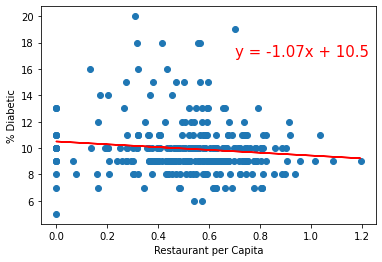

In [107]:
# Linear regression for all years
x_values = diabetes_fastfood_pd['Restaurant per Capita']
y_values = diabetes_fastfood_pd['% Diabetic']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.7,17),fontsize=15,color="red")
plt.xlabel('Restaurant per Capita')
plt.ylabel('% Diabetic')
print(f"The r-squared is: {rvalue**2}")
plt.show()